In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
claim_frequecy_df= pd.read_csv("C:\\Users\\abhinav.g.raj\\Desktop\\Insurance claim Modelling\\claim_frequency.csv")
claim_frequecy_df

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region
0,1.0,1,0.10000,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes
1,3.0,1,0.77000,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes
2,5.0,1,0.75000,6,2,52,50,B12,Diesel,B,54,Picardie
3,10.0,1,0.09000,7,0,46,50,B12,Diesel,B,76,Aquitaine
4,11.0,1,0.84000,7,0,46,50,B12,Diesel,B,76,Aquitaine
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,4,0,54,50,B12,Regular,E,3317,Provence-Alpes-Cote-D'Azur
678009,6114327.0,0,0.00274,4,0,41,95,B12,Regular,E,9850,Ile-de-France
678010,6114328.0,0,0.00274,6,2,45,50,B12,Diesel,D,1323,Rhone-Alpes
678011,6114329.0,0,0.00274,4,0,60,50,B12,Regular,B,95,Bourgogne


In [4]:
claim_frequecy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678012 non-null  float64
 1   ClaimNb     678013 non-null  int64  
 2   Exposure    678013 non-null  float64
 3   VehPower    678013 non-null  int64  
 4   VehAge      678013 non-null  int64  
 5   DrivAge     678013 non-null  int64  
 6   BonusMalus  678013 non-null  int64  
 7   VehBrand    678013 non-null  object 
 8   VehGas      678013 non-null  object 
 9   Area        678013 non-null  object 
 10  Density     678013 non-null  int64  
 11  Region      678013 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 62.1+ MB


In [5]:
claim_frequecy_df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,6.780120e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621861e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,1.641781e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.157952e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


*Max(ClaimNb) is 16 and it looks suspicious****
Max(VehAge) is 100, looks suspicious****
Max(DrivAge) is 100, needs to check it also***
Max(BonusMalus) shall not exceed 100
Max(exposure) shall not exceed 1


In [6]:
claim_frequecy_df.isnull().sum()

IDpol         1
ClaimNb       0
Exposure      0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Area          0
Density       0
Region        0
dtype: int64

<Axes: >

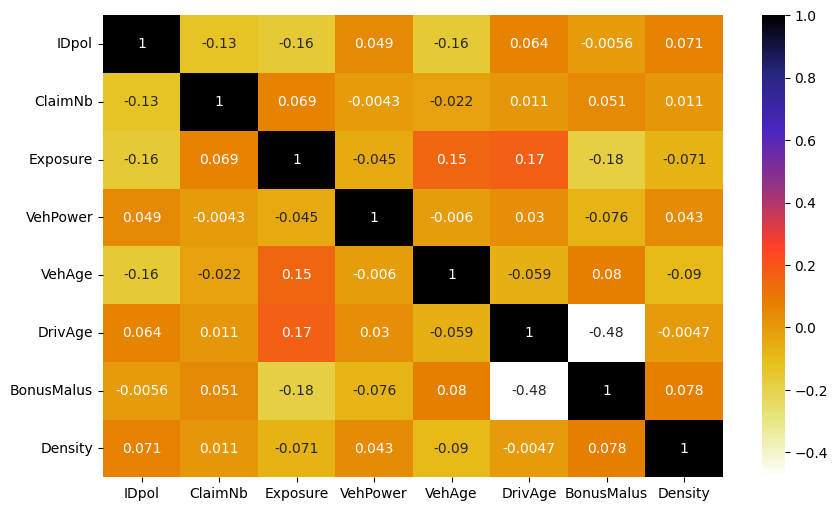

In [7]:
# See correlation between Features

df = claim_frequecy_df.select_dtypes(include=["number"])
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r)

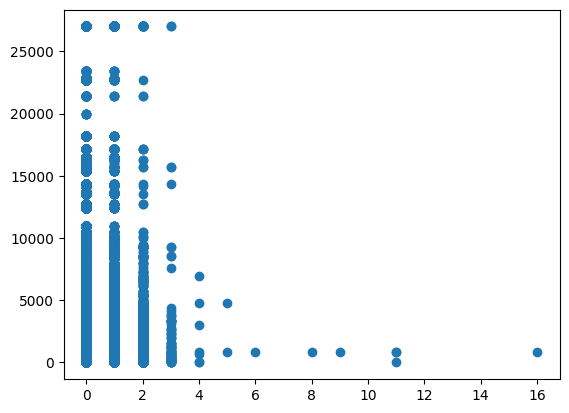

In [8]:
plt.scatter(x= df['ClaimNb'], y= df['Density'])
plt.show()

<Axes: xlabel='Exposure', ylabel='Count'>

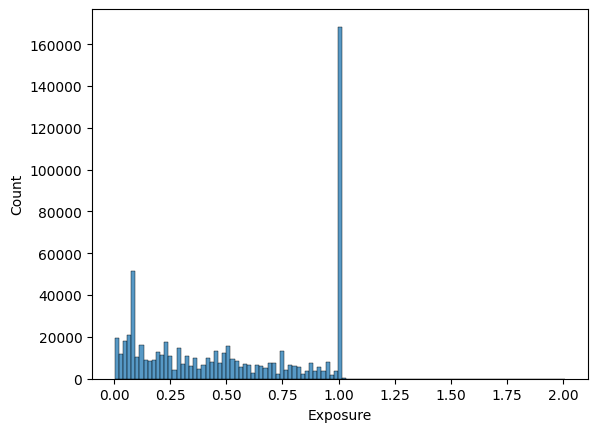

In [9]:

# sns.histplot(df['DrivAge'])
# sns.histplot(df['VehPower'])
sns.histplot(df['Exposure'])



In [10]:

# See unique count of records
claim_frequecy_df['IDpol'].nunique()   #in output we can see that count of unique value is 678012 and Total count is 678013. So we can assume that all values are unique


678012

# Univariate Analysis

array([[<Axes: title={'center': 'Exposure'}>,
        <Axes: title={'center': 'VehPower'}>],
       [<Axes: title={'center': 'VehAge'}>,
        <Axes: title={'center': 'DrivAge'}>],
       [<Axes: title={'center': 'BonusMalus'}>,
        <Axes: title={'center': 'Density'}>]], dtype=object)

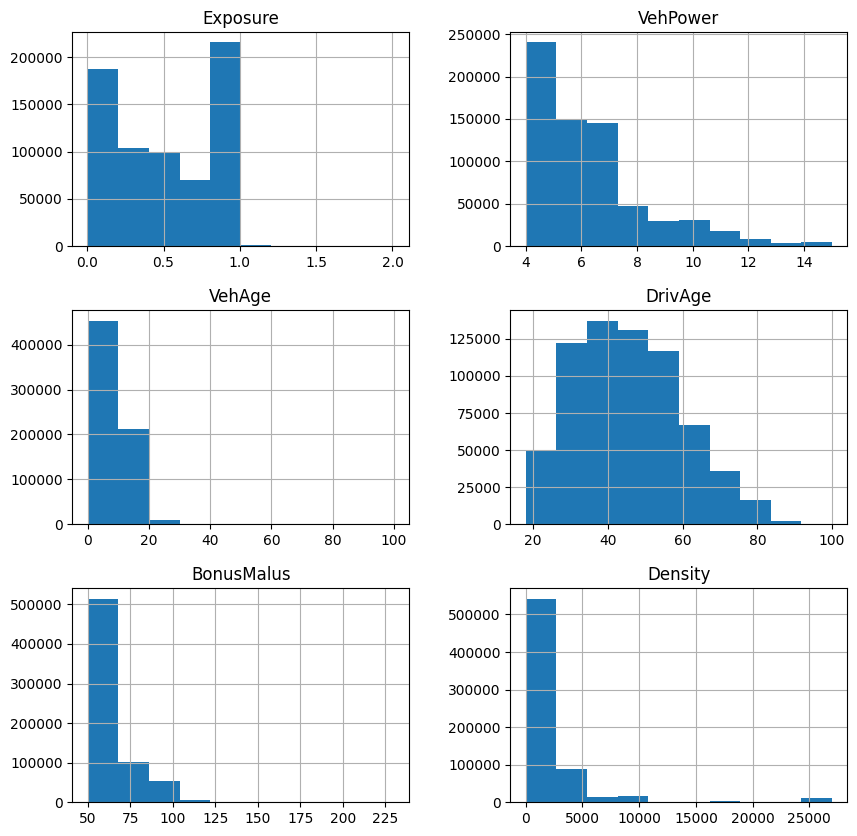

In [11]:
columns_to_include= ['Exposure','VehPower','VehAge','DrivAge','BonusMalus','Density']
claim_frequecy_df[columns_to_include].hist(figsize=(10,10))

In [12]:
#this one is a new dataset "Claim Severity"
claim_severity_df= pd.read_csv("C:\\Users\\abhinav.g.raj\\Desktop\\Insurance claim Modelling\\claim_severity.csv")
claim_severity_df

,IDpol,ClaimAmount
0,1552,995.20
1,1010996,1128.12
2,4024277,1851.11
3,4007252,1204.00
4,4046424,1204.00
...,...,...
26634,3254353,1200.00
26635,3254353,1800.00
26636,3254353,1000.00
26637,2222064,767.55


In [13]:
claim_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  int64  
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 416.4 KB


In [14]:
claim_frequecy_df[claim_frequecy_df['ClaimNb']==0].shape

(643953, 12)

In [15]:
claim_severity_df.shape

(26639, 2)

In [16]:
claim_severity_grouped_df = claim_severity_df.groupby(['IDpol'])['ClaimAmount'].sum().reset_index()  
# joined_df['ClaimAmount'].describe()
# joined_df[joined_df['ClaimAmount']>0].shape[0]

In [17]:
joined_df = pd.merge(claim_frequecy_df, claim_severity_grouped_df, how='left' , on='IDpol')   
joined_df['ClaimAmount'] = joined_df['ClaimAmount'].fillna(0)
joined_df

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,ClaimAmount
0,1.0,1,0.10000,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.0
1,3.0,1,0.77000,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.0
2,5.0,1,0.75000,6,2,52,50,B12,Diesel,B,54,Picardie,0.0
3,10.0,1,0.09000,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.0
4,11.0,1,0.84000,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,4,0,54,50,B12,Regular,E,3317,Provence-Alpes-Cote-D'Azur,0.0
678009,6114327.0,0,0.00274,4,0,41,95,B12,Regular,E,9850,Ile-de-France,0.0
678010,6114328.0,0,0.00274,6,2,45,50,B12,Diesel,D,1323,Rhone-Alpes,0.0
678011,6114329.0,0,0.00274,4,0,60,50,B12,Regular,B,95,Bourgogne,0.0


In [18]:
joined_df['Exposure'] =joined_df['Exposure'].apply(lambda x: 1 if x>1 else x)  # capping exposure to 1 
joined_df['ClaimNb'] =joined_df['ClaimNb'].apply(lambda x: 4 if x>4 else x)   # capping ClaimNb to 1
joined_df['ClaimNb']= np.where(joined_df['ClaimAmount']==0,0, joined_df['ClaimNb'])  # when ClaimAmount ==0, then ClaimNb shall also be 0 :>


In [19]:
  # train_test split as 90:10



# Now let's apply preprocessing on train Data. We will remove outliers, create bins, and tokenize using only the train set and not the test set: to prevent data leakage(Data leakage happens when information from outside the training dataset is used to create the model in a way that gives it an unfair advantage) and ensure our model generalizes well to unseen data.

In [20]:
# train_df['VehAge'] =train_df['VehAge'].apply(lambda x: 20 if x>20 else x)  # Cap VehAge to 20 ma
joined_df['DrivAge'] =joined_df['DrivAge'].apply(lambda x: 18 if x<18 else ( 90 if x>90 else x))  # if DrivAge is<18 then set it to 18. If DrivAge>90 set it to 90. Else keep as it is
# print(train_df['DrivAge'].max())
# print(train_df['DrivAge'].min())
joined_df.reset_index()
#train_df[train_df['ClaimNb']>4]


,index,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,ClaimAmount
0,0,1.0,0,0.10000,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.0
1,1,3.0,0,0.77000,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.0
2,2,5.0,0,0.75000,6,2,52,50,B12,Diesel,B,54,Picardie,0.0
3,3,10.0,0,0.09000,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.0
4,4,11.0,0,0.84000,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,678008,6114326.0,0,0.00274,4,0,54,50,B12,Regular,E,3317,Provence-Alpes-Cote-D'Azur,0.0
678009,678009,6114327.0,0,0.00274,4,0,41,95,B12,Regular,E,9850,Ile-de-France,0.0
678010,678010,6114328.0,0,0.00274,6,2,45,50,B12,Diesel,D,1323,Rhone-Alpes,0.0
678011,678011,6114329.0,0,0.00274,4,0,60,50,B12,Regular,B,95,Bourgogne,0.0


Bonus-Malus is french terms for No Claim Bonus.
How Bonus-Malus Works:
Insurers assign each driver a Bonus-Malus Score (BMS).
It typically starts at 100% (neutral level) and adjusts yearly based on the driver’s history.
If you don’t claim, the score reduces (e.g., 90%, 80%), lowering your premium.
If you file a claim, the score increases (e.g., 110%, 130%), raising your premium.
Example:

Year	Claims?	Bonus-Malus Score	Effect on Premium
2023	No	    90%	                10% discount
2024	No	    80%	                20% discount
2025	Yes	    110%                10% increase

In [21]:
#Lets Handle Bonus-Malus: cap max value to 150, create Binning and setting
# QUESTION: why Binning is important? ANS: Binning simplifies data by turning continuous variables into categories, reducing noise, preventing overfitting, and making models easier to understand. It works well with skewed data and models like Decision Trees.
joined_df['BonusMalus'] = joined_df['BonusMalus'].apply(lambda x: 150 if x>150 else x)  # cap max(Bonus_malus) to 150
bin_size=10
joined_df['BonusMalusBin']= joined_df['BonusMalus'].apply(lambda x: x -  x % bin_size)  
# train_df['BonusMalus'].max()  #output is 150


In [22]:
#density refers to the density of the area where the policyholder is located.  Lets Handle "Density": we will create log(Density), create Bin of log(density) i.e. if log(Density)==2.354 then we will Bin it as 2:3, tokenazie it and keep LogDensityBin0
joined_df['LogDensity'] = np.log(joined_df['Density'])
joined_df['LogDensityBin'] = joined_df['LogDensity'].astype(int)
joined_df #this steps removes decimal value from "LogDensity" column and takes integer part 
joined_df.head()



,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,ClaimAmount,BonusMalusBin,LogDensity,LogDensityBin
0,1.0,0,0.10,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.0,50,7.104144,7
1,3.0,0,0.77,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.0,50,7.104144,7
2,5.0,0,0.75,6,2,52,50,B12,Diesel,B,54,Picardie,0.0,50,3.988984,3
3,10.0,0,0.09,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.0,50,4.330733,4
4,11.0,0,0.84,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.0,50,4.330733,4


In [23]:

# let's do train-test split
from sklearn.model_selection import train_test_split
train_df, test_df= train_test_split(joined_df, test_size=0.1, random_state=42)


In [29]:
# Lets Predict Claim Frequency
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula_claim_frequency = "ClaimNb~ Exposure+ VehPower+ VehAge+ DrivAge+ Density+ BonusMalusBin+ LogDensityBin+ C(VehGas)+ C(Area)+ C(Region)"
claim_frequency_glm_model= smf.glm(formula=formula_claim_frequency, data= train_df, family= sm.families.Poisson()).fit()
# print(claim_frequency_glm_model.summary())


In [ ]:
test_df= test_df.drop(columns=['']
test_df["Predicted_frequency"] = claim_frequency_glm_model.predict(test_df)
# test_df
train_df

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,ClaimAmount,BonusMalusBin,LogDensity,LogDensityBin
74964,157038.0,0,0.24,7,12,48,50,B2,Regular,A,14,Centre,0.0,50,2.639057,2
375336,3034432.0,0,0.06,4,0,33,100,B12,Regular,C,204,Languedoc-Roussillon,0.0,100,5.318120,5
537539,4128717.0,0,0.84,8,12,45,50,B13,Diesel,A,34,Centre,0.0,50,3.526361,3
455610,3187436.0,0,1.00,5,4,51,50,B1,Diesel,A,40,Bretagne,0.0,50,3.688879,3
656960,6066277.0,0,0.22,9,2,79,50,B12,Regular,E,2658,Rhone-Alpes,0.0,50,7.885329,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2118590.0,0,0.35,10,6,57,85,B12,Diesel,D,879,Rhone-Alpes,0.0,80,6.778785,6
365838,3020007.0,0,0.87,10,10,46,56,B5,Diesel,D,1609,Ile-de-France,0.0,50,7.383368,7
131932,1089081.0,0,1.00,8,8,35,50,B5,Regular,E,3744,Provence-Alpes-Cote-D'Azur,0.0,50,8.227910,8
671155,6104970.0,0,0.50,11,1,32,54,B12,Regular,E,6485,Ile-de-France,0.0,50,8.777247,8


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,ClaimAmount,BonusMalusBin,LogDensity,LogDensityBin,Predicted_frequency
261354,2122523.0,0,0.43,7,18,36,95,B1,Regular,D,1054,Centre,0.0,90,6.960348,6,0.054116
448143,3173420.0,0,0.10,7,17,80,95,B2,Regular,D,598,Basse-Normandie,0.0,90,6.393591,6,0.040812
188618,1188619.0,0,0.33,7,3,36,76,B6,Regular,E,4172,Rhone-Alpes,0.0,70,8.336151,8,0.041775
12952,31400.0,0,0.56,5,4,73,52,B13,Diesel,A,15,Centre,0.0,50,2.708050,2,0.026608
425028,3138755.0,0,0.27,8,0,37,50,B11,Diesel,E,3021,Bretagne,0.0,50,8.013343,8,0.024672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309317,2221128.0,0,0.41,7,1,56,50,B1,Diesel,D,824,Languedoc-Roussillon,0.0,50,6.714171,6,0.025667
619226,5060693.0,0,0.38,12,1,52,51,B12,Diesel,C,383,Provence-Alpes-Cote-D'Azur,0.0,50,5.948035,5,0.028195
189252,1189253.0,0,1.00,8,12,38,50,B1,Diesel,D,570,Provence-Alpes-Cote-D'Azur,0.0,50,6.345636,6,0.064026
643957,6013575.0,0,0.38,5,3,40,50,B1,Diesel,B,61,Bourgogne,0.0,50,4.110874,4,0.017587


In [ ]:
#Lets predict Claim Severity 
claim_severity_analysis= train_df[train_df['ClaimNb']>0]
formula_claim_severity= "ClaimAmount ~ ClaimNb+Exposure+VehPower+VehAge+DrivAge+BonusMalusBin+LogDensityBin+ C(VehBrand)+C(VehGas)+C(Area)+ C(Region)"
claim_severity_glm_model= smf.glm(formula=formula_claim_severity, data= claim_severity_analysis, family=sm.families.Poisson).fit()
test_df['predicted_amount']= claim_severity_glm_model.predict(test_df)
test_df


c:\Users\abhinav.g.raj\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The property link function does not respect the domain of the type family.
  warnings.warn((f"The {type(family.link).__name__} link function "


TypeError: Family.starting_mu() missing 1 required positional argument: 'y'